# Explanatory Data Analysis on cat36 - cat53
## Author: Audrey Trinh

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('../data/claims_data.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [ ]:
# Select cat36 to cat53 and loss
cat_features = [f"cat{i}" for i in range(36, 54)]
subset = df[cat_features + ["loss"]]

print(f"Selected columns: {cat_features}")
print(f"Shape: {subset.shape}\n")

Selected columns: ['cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53']
Shape: (188318, 19)



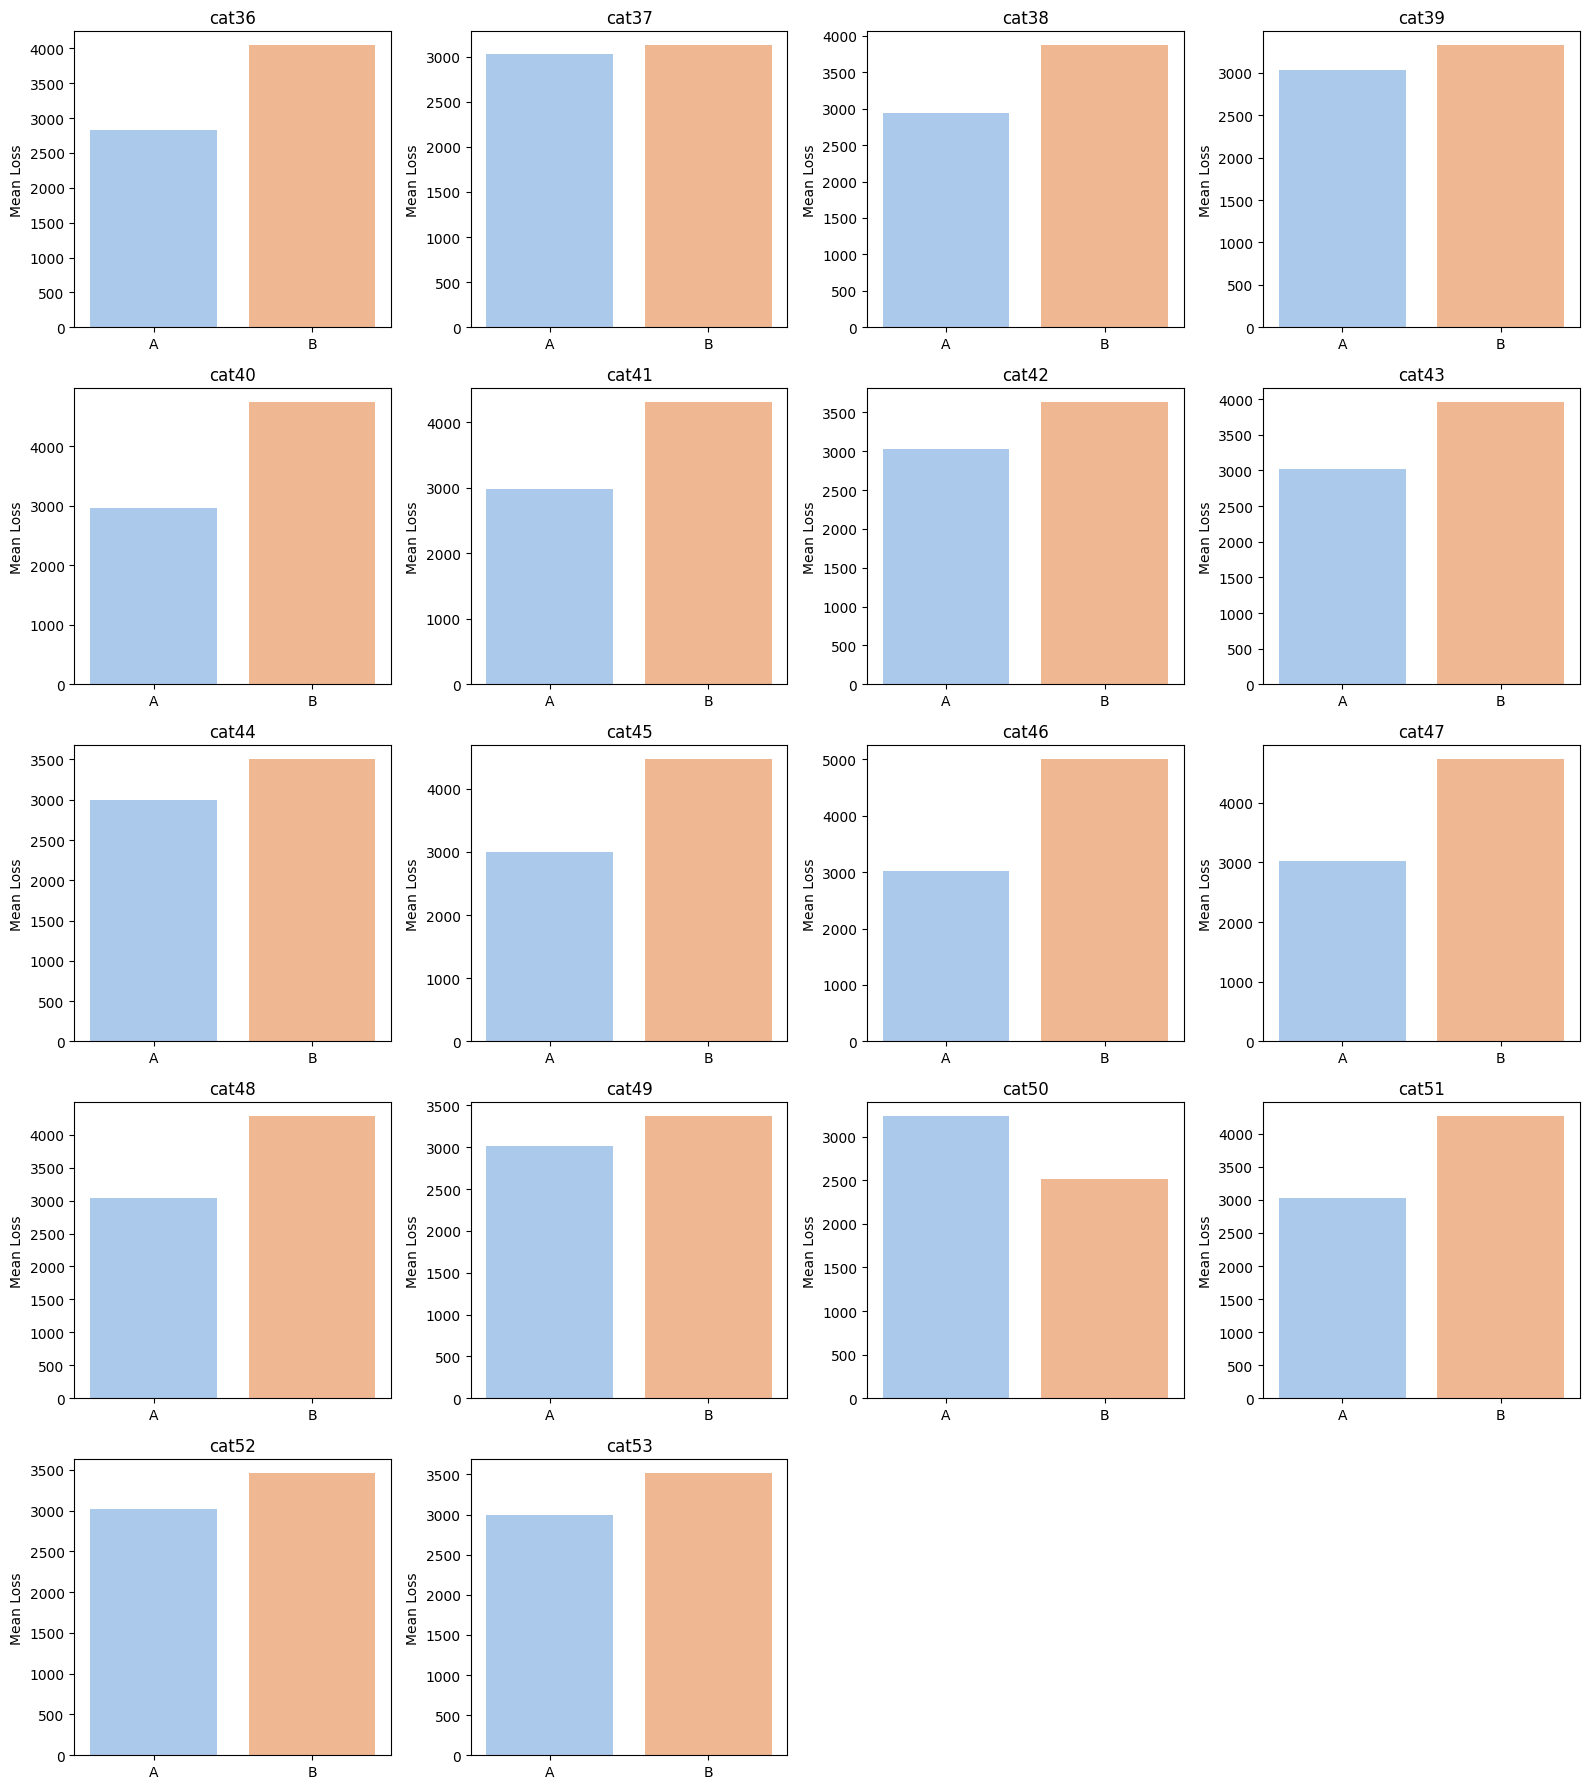

In [21]:
# Plot average loss for each categorical feature
n_cols = 4
n_rows = int(np.ceil(len(cat_features) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 18))
axes = axes.flatten()

for i, col in enumerate(cat_features):
    sns.barplot(x=col, y='loss', data=subset, estimator=np.mean, ci=None, palette='pastel', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Mean Loss')

plt.tight_layout()
plt.show()

In [25]:
result = []
for col in cat_features:
    means = df.groupby(col)['loss'].mean()
    if 'A' in means and 'B' in means:
        diff = means['B'] - means['A']
        result.append({'feature': col, 'A_mean': means['A'], 'B_mean': means['B'], 'difference': diff})
diff_df = pd.DataFrame(result).sort_values(by='difference', ascending=False)
diff_df

,feature,A_mean,B_mean,difference
10,cat46,3028.108465,4998.662211,1970.553746
4,cat40,2959.775966,4741.245410,1781.469445
11,cat47,3031.022527,4727.538916,1696.516389
9,cat45,3003.736870,4466.098435,1462.361566
5,cat41,2987.398415,4304.365715,1316.967299
12,cat48,3035.563741,4277.443792,1241.880051
15,cat51,3029.167842,4262.951820,1233.783978
0,cat36,2831.646555,4041.936896,1210.290342
7,cat43,3016.362915,3955.033752,938.670837
2,cat38,2944.277300,3866.885654,922.608354


For most features, category B is associated with substantially higher average claim losses compared to category A. In particular, features such as cat46, cat40, cat47, cat45, and cat41 stand out, with 'B' consistently associated with much higher average losses, ranging from about $1,300 to nearly $2,000 more than 'A'. This indicates that these variables likely capture important risk-related distinctions among policyholders and should be included in modeling. Other variables, such as show relatively small or even negative differences, suggesting they contribute less predictive information. Therefore, for feature selection or model emphasis, it would be reasonable to prioritize cat40 to cat47, especially cat46, which has the strongest relationship with loss.

In [22]:
# Encode categorical features: 'B' as 1, 'A' as 0
subset_encoded = subset.copy()
subset_encoded[cat_features] = (subset_encoded[cat_features] == 'B').astype(int)

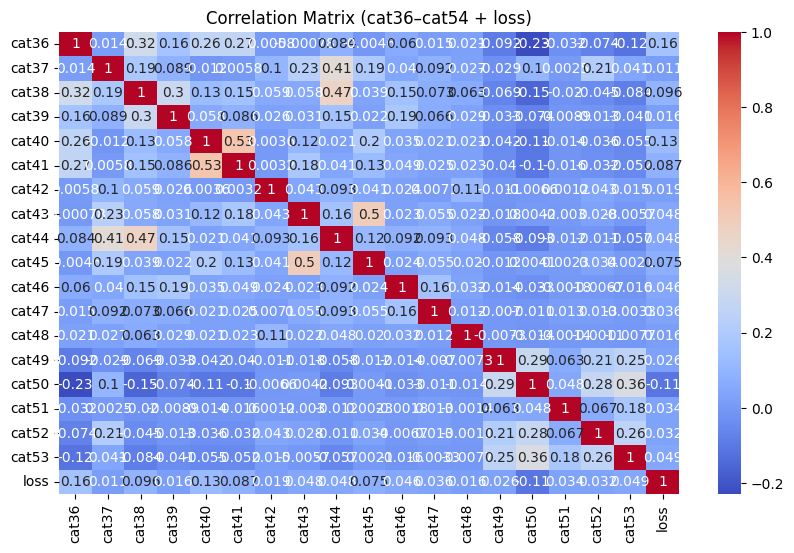

In [23]:
# Correlation matrix
corr = subset_encoded.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (cat36–cat54 + loss)')
plt.show()

Across all features, the category A appears much more frequently than B, indicating a strong class imbalance. The correlation matrix shows that the relationships between these variables and the target variable loss are generally weak, with correlation coefficients ranging roughly between -0.2 and 0.2. This suggests that none of these features individually have a strong linear relationship with claim severity.

However, certain pairs of features, such as cat40 with cat41, and cat43 with cat45, show moderate positive correlations (around 0.5), implying that these pairs may represent related characteristics or policy conditions. The rest of the features are largely independent or weakly correlated, meaning they likely capture different aspects of the dataset.